In [1]:
#Objetivo deste notebook é performar a redução de features utilizando Princiapal Component Analysis
#Essa análise permite a redução de features a partir da análise de quais features são mais responsáveis
#Pela covariância do Dataset

#Leitura do Dataset para análise

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def get_morgan_fingerprints(fp_filepath='/Users/leonardoyamaguishi/Documents/GitFiles/DataSci4Health/datasci4heatlh/data/egfr_erbB1_morgan_2048.npy',
                            labels_filepath='/Users/leonardoyamaguishi/Documents/GitFiles/DataSci4Health/datasci4heatlh/data/egfr_erbB1_labels.csv'):
    return np.load(fp_filepath), pd.read_csv(labels_filepath, index_col=0)

morgan_fp, labels_df = get_morgan_fingerprints()

Text(0, 0.5, 'Cumulative explained variance')

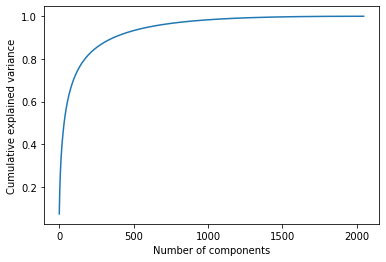

In [2]:
#Análise PCA das features da fingerprint
pca = PCA().fit(morgan_fp)

#Visualização da quantidade de bits vs variância cumulativa do Dataset
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [3]:
#Função para experimentação
def pca_reduce_dim(feature_df, desired_variance):
    pca = PCA(desired_variance).fit(feature_df)
    reduced = pca.transform(feature_df)
    print('{} of variance explained by {} components'.format((desired_variance * 100), pca.n_components_))
    return reduced

In [4]:
#Quantidades de Bits vs % da variância do Dataset
pca = PCA(0.50).fit(morgan_fp)
print('50% of variance explained by {} components'.format(pca.n_components_))

pca = PCA(0.80).fit(morgan_fp)
print('80% of variance explained by {} components'.format(pca.n_components_))

pca = PCA(0.95).fit(morgan_fp)
print('95% of variance explained by {} components'.format(pca.n_components_))

50% of variance explained by 34 components
80% of variance explained by 174 components
95% of variance explained by 607 components


In [5]:
#Reduction to 2 components for 2D analysis
pca_2d = PCA(n_components = 2).fit(morgan_fp)
morgan_2d_df = pca_2d.transform(morgan_fp)

Text(0, 0.5, 'Axis 1')

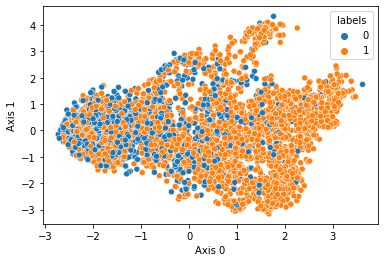

In [10]:
p1 = sns.scatterplot(x = morgan_2d_df[:,0], y = morgan_2d_df[:,1], hue = labels_df['labels'])
plt.xlabel('Axis 0')
plt.ylabel('Axis 1')

In [7]:
pca_2d.explained_variance_ratio_

array([0.07350578, 0.03997811])